Rainfall

Output


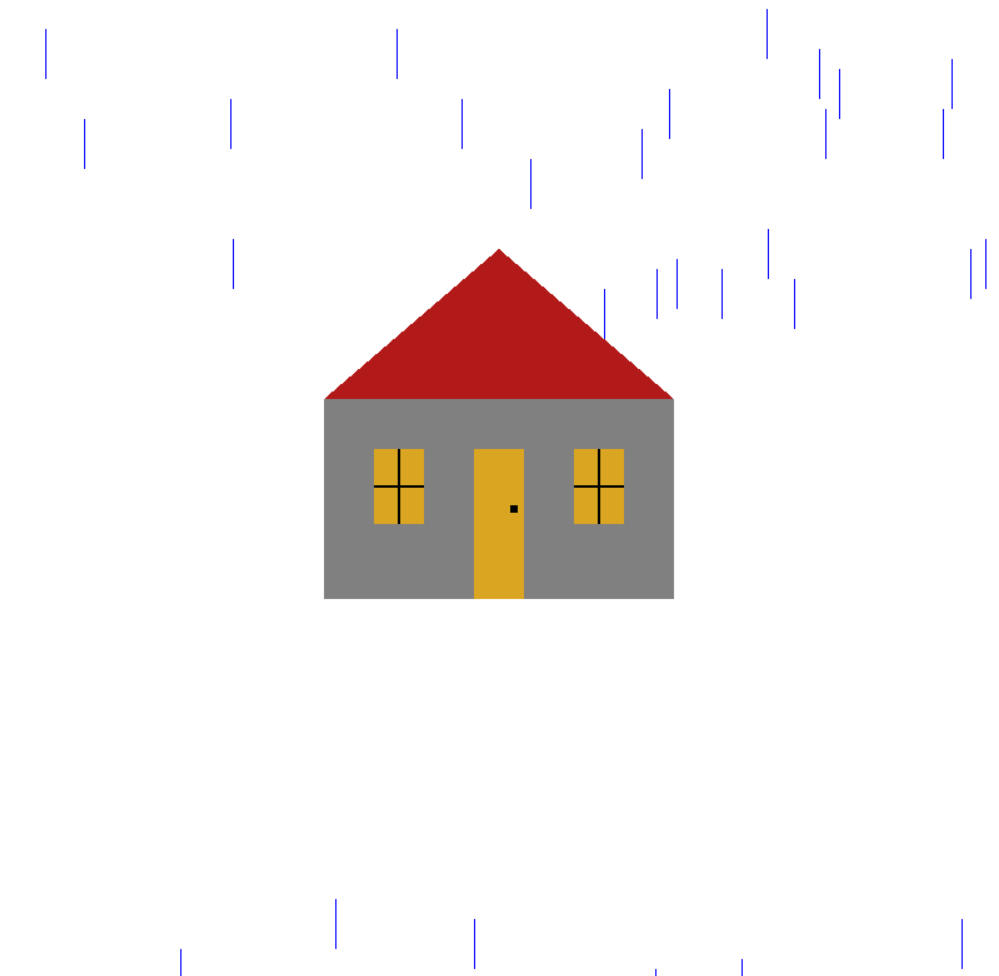

In [1]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203212.png"))

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
import random

# ------------------ GLOBAL VARIABLES ------------------
background_color = [1.0, 1.0, 1.0]   # WHITE background
door_color = (0.855, 0.647, 0.125)
house_color = (0.5, 0.5, 0.5)
roof_color = (0.7, 0.1, 0.1)
rain_color = (0.0, 0.0, 1.0)         # BLUE rain

num_raindrops = 30
rain_x1 = [0.0] * num_raindrops
rain_y1 = [0.0] * num_raindrops
rain_x2 = [0.0] * num_raindrops
rain_y2 = [0.0] * num_raindrops

rain_direction = 0   # -1 left, 0 straight, 1 right

# ------------------ DRAW FUNCTIONS ------------------
def drawBackground():
    glColor3fv(background_color)
    glBegin(GL_QUADS)
    glVertex2f(-1, -1)
    glVertex2f(1, -1)
    glVertex2f(1, 1)
    glVertex2f(-1, 1)
    glEnd()

def drawHouse():
    # House body
    glColor3fv(house_color)
    glBegin(GL_TRIANGLES)
    glVertex2f(-0.35, 0.2)
    glVertex2f(-0.35, -0.2)
    glVertex2f(0.0, 0.2)

    glVertex2f(0.35, 0.2)
    glVertex2f(0.35, -0.2)
    glVertex2f(0.0, 0.2)

    glVertex2f(-0.35, -0.2)
    glVertex2f(0.35, -0.2)
    glVertex2f(0.0, 0.2)
    glEnd()

    # Door
    glColor3fv(door_color)
    glBegin(GL_QUADS)
    glVertex2f(-0.05, -0.2)
    glVertex2f(0.05, -0.2)
    glVertex2f(0.05, 0.1)
    glVertex2f(-0.05, 0.1)
    glEnd()

    # Door knob
    glPointSize(6)
    glColor3f(0, 0, 0)
    glBegin(GL_POINTS)
    glVertex2f(0.03, -0.02)
    glEnd()

    # -------- WINDOWS (LEFT & RIGHT) --------
    def drawWindow(x):
        glColor3fv(door_color)
        glBegin(GL_QUADS)
        glVertex2f(x - 0.05, 0.1)
        glVertex2f(x + 0.05, 0.1)
        glVertex2f(x + 0.05, -0.05)
        glVertex2f(x - 0.05, -0.05)
        glEnd()

        glColor3f(0, 0, 0)
        glLineWidth(2)
        glBegin(GL_LINES)
        glVertex2f(x, 0.1)
        glVertex2f(x, -0.05)
        glVertex2f(x - 0.05, 0.025)
        glVertex2f(x + 0.05, 0.025)
        glEnd()

    drawWindow(-0.2)   # LEFT window
    drawWindow(0.2)    # RIGHT window

    # Roof
    glColor3fv(roof_color)
    glBegin(GL_TRIANGLES)
    glVertex2f(-0.35, 0.2)
    glVertex2f(0.35, 0.2)
    glVertex2f(0.0, 0.5)
    glEnd()

def drawRain():
    glColor3fv(rain_color)
    glLineWidth(1)
    glBegin(GL_LINES)
    for i in range(num_raindrops):
        glVertex2f(rain_x1[i], rain_y1[i])
        glVertex2f(rain_x2[i], rain_y2[i])
    glEnd()

# ------------------ RAIN LOGIC ------------------
def initializeRain():
    for i in range(num_raindrops):
        rain_x1[i] = random.uniform(-1, 1)
        rain_y1[i] = random.uniform(0, 1)
        rain_x2[i] = rain_x1[i]
        rain_y2[i] = rain_y1[i] - 0.1

def updateRain():
    for i in range(num_raindrops):
        rain_y1[i] -= 0.02
        rain_y2[i] -= 0.02

        rain_x2[i] += rain_direction * 0.01

        # Reset rain if it goes below screen
        if rain_y1[i] < -1:
            rain_y1[i] = 1
            rain_y2[i] = 0.9
            rain_x1[i] = random.uniform(-1, 1)
            rain_x2[i] = rain_x1[i]

    glutPostRedisplay()

# ------------------ CALLBACKS ------------------
def display():
    glClear(GL_COLOR_BUFFER_BIT)
    glLoadIdentity()
    drawBackground()
    drawHouse()
    drawRain()
    glutSwapBuffers()

def specialKeyListener(key, x, y):
    global rain_direction
    if key == GLUT_KEY_LEFT:
        rain_direction = -1
    elif key == GLUT_KEY_RIGHT:
        rain_direction = 1

def keyboardListener(key, x, y):
    if key == b'd':  # Day
        for i in range(3):
            background_color[i] = min(1.0, background_color[i] + 0.1)
    elif key == b'n':  # Night
        for i in range(3):
            background_color[i] = max(0.0, background_color[i] - 0.1)

# ------------------ INIT ------------------
glutInit()
glutInitWindowSize(800, 800)
glutCreateWindow(b"Cozy House in the Rain")

initializeRain()

glutDisplayFunc(display)
glutIdleFunc(updateRain)        # AUTOMATIC RAIN
glutSpecialFunc(specialKeyListener)
glutKeyboardFunc(keyboardListener)

glutMainLoop()


Snowfall

Output


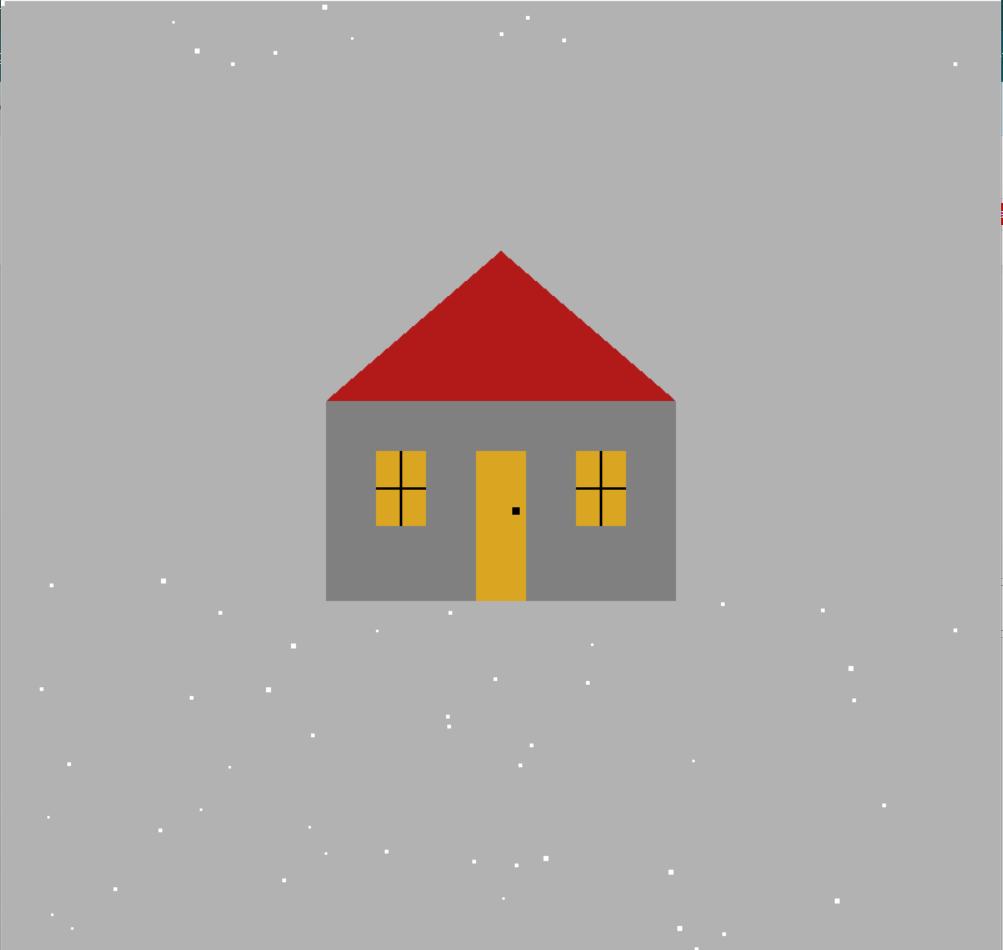

In [2]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203229.png"))

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
import random

# ------------------ GLOBAL VARIABLES ------------------
background_color = [0.7, 0.7, 0.7]   # Grey background
door_color = (0.855, 0.647, 0.125)
house_color = (0.5, 0.5, 0.5)
roof_color = (0.7, 0.1, 0.1)
snow_color = (1.0, 1.0, 1.0)         # White snow

num_snowflakes = 60

snow_x = [0.0] * num_snowflakes
snow_y = [0.0] * num_snowflakes
snow_size = [0.0] * num_snowflakes

# ------------------ DRAW FUNCTIONS ------------------
def drawBackground():
    glColor3fv(background_color)
    glBegin(GL_QUADS)
    glVertex2f(-1, -1)
    glVertex2f(1, -1)
    glVertex2f(1, 1)
    glVertex2f(-1, 1)
    glEnd()

def drawHouse():
    glColor3fv(house_color)
    glBegin(GL_TRIANGLES)
    glVertex2f(-0.35, 0.2)
    glVertex2f(-0.35, -0.2)
    glVertex2f(0.0, 0.2)

    glVertex2f(0.35, 0.2)
    glVertex2f(0.35, -0.2)
    glVertex2f(0.0, 0.2)

    glVertex2f(-0.35, -0.2)
    glVertex2f(0.35, -0.2)
    glVertex2f(0.0, 0.2)
    glEnd()

    # Door
    glColor3fv(door_color)
    glBegin(GL_QUADS)
    glVertex2f(-0.05, -0.2)
    glVertex2f(0.05, -0.2)
    glVertex2f(0.05, 0.1)
    glVertex2f(-0.05, 0.1)
    glEnd()

    # Door knob
    glPointSize(6)
    glColor3f(0, 0, 0)
    glBegin(GL_POINTS)
    glVertex2f(0.03, -0.02)
    glEnd()

    # Windows
    def drawWindow(x):
        glColor3fv(door_color)
        glBegin(GL_QUADS)
        glVertex2f(x - 0.05, 0.1)
        glVertex2f(x + 0.05, 0.1)
        glVertex2f(x + 0.05, -0.05)
        glVertex2f(x - 0.05, -0.05)
        glEnd()

        glColor3f(0, 0, 0)
        glLineWidth(2)
        glBegin(GL_LINES)
        glVertex2f(x, 0.1)
        glVertex2f(x, -0.05)
        glVertex2f(x - 0.05, 0.025)
        glVertex2f(x + 0.05, 0.025)
        glEnd()

    drawWindow(-0.2)
    drawWindow(0.2)

    # Roof
    glColor3fv(roof_color)
    glBegin(GL_TRIANGLES)
    glVertex2f(-0.35, 0.2)
    glVertex2f(0.35, 0.2)
    glVertex2f(0.0, 0.5)
    glEnd()

def drawSnow():
    glColor3fv(snow_color)
    for i in range(num_snowflakes):
        glPointSize(snow_size[i])
        glBegin(GL_POINTS)
        glVertex2f(snow_x[i], snow_y[i])
        glEnd()

# ------------------ SNOW LOGIC ------------------
def initializeSnow():
    for i in range(num_snowflakes):
        snow_x[i] = random.uniform(-1, 1)
        snow_y[i] = random.uniform(0, 1)
        snow_size[i] = random.uniform(2, 4)

def updateSnow():
    for i in range(num_snowflakes):
        snow_y[i] -= 0.003                      # slow fall
        snow_x[i] += random.uniform(-0.0008, 0.0008)

        if snow_y[i] < -1:
            snow_y[i] = 1
            snow_x[i] = random.uniform(-1, 1)

    glutPostRedisplay()

# ------------------ DISPLAY ------------------
def display():
    glClear(GL_COLOR_BUFFER_BIT)
    glLoadIdentity()
    drawBackground()
    drawHouse()
    drawSnow()
    glutSwapBuffers()

# ------------------ INIT ------------------
glutInit()
glutInitWindowSize(800, 800)
glutCreateWindow(b"Cozy House with Snowfall")

initializeSnow()

glutDisplayFunc(display)
glutIdleFunc(updateSnow)

glutMainLoop()


Car Moving

Output


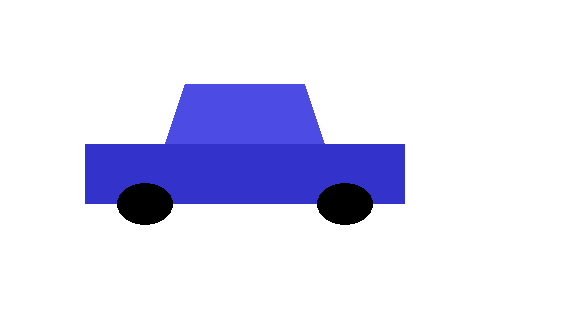

In [3]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203245.png"))

In [1]:
import glfw
from OpenGL.GL import *
import math
import time

# ------------------ DRAW FUNCTIONS ------------------

def draw_circle(cx, cy, r):
    glBegin(GL_POLYGON)
    for i in range(30):
        angle = 2 * math.pi * i / 30
        glVertex2f(cx + r * math.cos(angle),
                   cy + r * math.sin(angle))
    glEnd()

def draw_car(x):
    # ---- Car Body ----
    glColor3f(0.2, 0.2, 0.8)  # Blue car
    glBegin(GL_QUADS)
    glVertex2f(x - 0.4, -0.3)
    glVertex2f(x + 0.4, -0.3)
    glVertex2f(x + 0.4, -0.1)
    glVertex2f(x - 0.4, -0.1)
    glEnd()

    # ---- Car Roof ----
    glColor3f(0.3, 0.3, 0.9)
    glBegin(GL_QUADS)
    glVertex2f(x - 0.2, -0.1)
    glVertex2f(x + 0.2, -0.1)
    glVertex2f(x + 0.15, 0.1)
    glVertex2f(x - 0.15, 0.1)
    glEnd()

    # ---- Wheels ----
    glColor3f(0.0, 0.0, 0.0)
    draw_circle(x - 0.25, -0.3, 0.07)
    draw_circle(x + 0.25, -0.3, 0.07)

# ------------------ MAIN PROGRAM ------------------

if not glfw.init():
    raise Exception("GLFW cannot be initialized")

window = glfw.create_window(800, 600, "2D Moving Car", None, None)
if not window:
    glfw.terminate()
    raise Exception("Window cannot be created")

glfw.make_context_current(window)

# White background
glClearColor(1.0, 1.0, 1.0, 1.0)

x_position = -1.2  # Start from left

while not glfw.window_should_close(window):
    glClear(GL_COLOR_BUFFER_BIT)

    draw_car(x_position)

    # Update position
    x_position += 0.01
    if x_position > 1.2:
        x_position = -1.2

    glfw.swap_buffers(window)
    glfw.poll_events()
    time.sleep(0.01)  # Frame control

glfw.terminate()


Car In front of House

Output


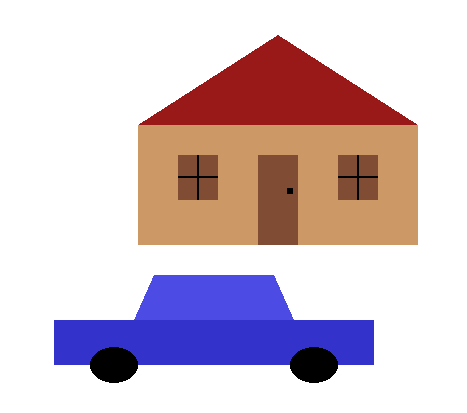

In [4]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203255.png"))

In [2]:
import glfw
from OpenGL.GL import *
import math
import time

# ------------------ COLORS ------------------
house_color = (0.8, 0.6, 0.4)
door_color  = (0.5, 0.3, 0.2)
roof_color  = (0.6, 0.1, 0.1)

# ------------------ CAR FUNCTIONS ------------------

def draw_circle(cx, cy, r):
    glBegin(GL_POLYGON)
    for i in range(30):
        angle = 2 * math.pi * i / 30
        glVertex2f(cx + r * math.cos(angle),
                   cy + r * math.sin(angle))
    glEnd()

def draw_car(x):
    # Car Body
    glColor3f(0.2, 0.2, 0.8)
    glBegin(GL_QUADS)
    glVertex2f(x - 0.4, -0.6)
    glVertex2f(x + 0.4, -0.6)
    glVertex2f(x + 0.4, -0.45)
    glVertex2f(x - 0.4, -0.45)
    glEnd()

    # Roof
    glColor3f(0.3, 0.3, 0.9)
    glBegin(GL_QUADS)
    glVertex2f(x - 0.2, -0.45)
    glVertex2f(x + 0.2, -0.45)
    glVertex2f(x + 0.15, -0.30)
    glVertex2f(x - 0.15, -0.30)
    glEnd()

    # Wheels
    glColor3f(0.0, 0.0, 0.0)
    draw_circle(x - 0.25, -0.6, 0.06)
    draw_circle(x + 0.25, -0.6, 0.06)

# ------------------ HOUSE FUNCTION ------------------

def drawHouse():
    glPushMatrix()
    glTranslatef(0.5, 0.0, 0.0)   # Move house to the right

    # House Body
    glColor3fv(house_color)
    glBegin(GL_TRIANGLES)
    glVertex2f(-0.35, 0.2)
    glVertex2f(-0.35, -0.2)
    glVertex2f(0.0, 0.2)

    glVertex2f(0.35, 0.2)
    glVertex2f(0.35, -0.2)
    glVertex2f(0.0, 0.2)

    glVertex2f(-0.35, -0.2)
    glVertex2f(0.35, -0.2)
    glVertex2f(0.0, 0.2)
    glEnd()

    # Door
    glColor3fv(door_color)
    glBegin(GL_QUADS)
    glVertex2f(-0.05, -0.2)
    glVertex2f(0.05, -0.2)
    glVertex2f(0.05, 0.1)
    glVertex2f(-0.05, 0.1)
    glEnd()

    # Door knob
    glPointSize(6)
    glColor3f(0, 0, 0)
    glBegin(GL_POINTS)
    glVertex2f(0.03, -0.02)
    glEnd()

    # Windows
    def drawWindow(x):
        glColor3fv(door_color)
        glBegin(GL_QUADS)
        glVertex2f(x - 0.05, 0.1)
        glVertex2f(x + 0.05, 0.1)
        glVertex2f(x + 0.05, -0.05)
        glVertex2f(x - 0.05, -0.05)
        glEnd()

        glColor3f(0, 0, 0)
        glLineWidth(2)
        glBegin(GL_LINES)
        glVertex2f(x, 0.1)
        glVertex2f(x, -0.05)
        glVertex2f(x - 0.05, 0.025)
        glVertex2f(x + 0.05, 0.025)
        glEnd()

    drawWindow(-0.2)
    drawWindow(0.2)

    # Roof
    glColor3fv(roof_color)
    glBegin(GL_TRIANGLES)
    glVertex2f(-0.35, 0.2)
    glVertex2f(0.35, 0.2)
    glVertex2f(0.0, 0.5)
    glEnd()

    glPopMatrix()

# ------------------ MAIN PROGRAM ------------------

if not glfw.init():
    raise Exception("GLFW cannot be initialized")

window = glfw.create_window(800, 600, "Car in Front of House", None, None)
if not window:
    glfw.terminate()
    raise Exception("Window cannot be created")

glfw.make_context_current(window)

# White background
glClearColor(1.0, 1.0, 1.0, 1.0)

x_position = -1.5

while not glfw.window_should_close(window):
    glClear(GL_COLOR_BUFFER_BIT)

    drawHouse()          # Draw house first (background object)
    draw_car(x_position) # Draw car in front

    x_position += 0.01
    if x_position > 1.5:
        x_position = -1.5

    glfw.swap_buffers(window)
    glfw.poll_events()
    time.sleep(0.01)

glfw.terminate()


Shapes

Output


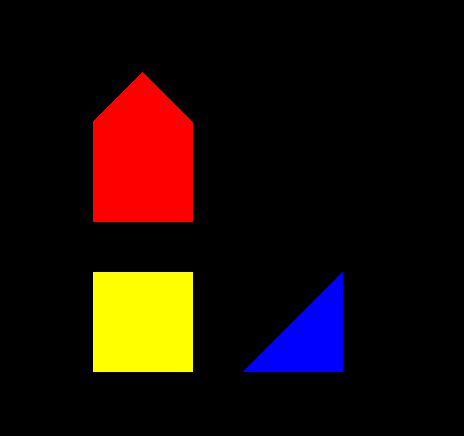

In [5]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203303.png"))

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

def main():
    # Square
    glBegin(GL_QUADS) #quadrilaterals (four vertices per quad).
    glColor3f(1.0, 1.0, 0.0)   # Yellow Values are floats from 0.0 to 1.0 (RGB).
    glVertex2f(100, 100)
    glVertex2f(200, 100)
    glVertex2f(200, 200)
    glVertex2f(100, 200)
    glEnd()

    # Triangle
    glBegin(GL_TRIANGLES)
    glColor3f(0.0, 0.0, 1.0)   # Blue
    glVertex2f(250, 100)
    glVertex2f(350, 100)
    glVertex2f(350, 200)
    glEnd()

    # Polygon
    glBegin(GL_POLYGON)
    glColor3f(1.0, 0.0, 0.0)   # Red
    glVertex2f(100, 250)
    glVertex2f(200, 250)
    glVertex2f(200, 350)
    glVertex2f(150, 400)
    glVertex2f(100, 350)
    glEnd()

def iterate():   # Sets up viewport and projection matrices.
    glViewport(0, 0, 500, 500)     #void glViewport(GLint x, GLint y, GLsizei width, GLsizei height);
    glMatrixMode(GL_PROJECTION)        #Subsequent matrix operations affect the projection (camera) transform.
    glLoadIdentity()                  #Reset projection matrix: Start from an identity matrix to avoid accumulating previous state.
    glOrtho(0.0, 500, 0.0, 500, 0.0, 1.0)           #Orthographic projection: Defines a 2D-like view where:

    #Left=0, Right=500, Bottom=0, Top=500 → coordinates match window pixels.

    #Near=0.0, Far=1.0 → depth range. We’re effectively drawing at z=0 in 2D.
    glMatrixMode(GL_MODELVIEW)       #Switch to model-view matrix: Subsequent matrix operations affect object placement and viewing transformation.
    glLoadIdentity()                 #Reset model-view matrix: Ensures no unintended transformations are applied to your shapes.

def showScreen():
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)         #Clear buffers:Wipes the color and depth buffers so you start with a clean frame.
    glLoadIdentity()                                          #Reset current matrix: Ensures no leftover transforms from prior frames in the model-view matrix.
    iterate()                                            #Set up projection/view: Apply viewport and orthographic projection for this frame.
    glColor3f(1.0, 1.0, 1.0)
    main()
    glutSwapBuffers()                              #Display the frame: Swaps the back buffer to the screen (requires double buffering). Prevents flicker and tearing.

# Main Function
glutInit()
glutInitDisplayMode(GLUT_DOUBLE | GLUT_RGBA | GLUT_DEPTH)
glutInitWindowSize(500, 500)
glutInitWindowPosition(0, 0)
wind = glutCreateWindow(b"OpenGL Basic Shape")
glutDisplayFunc(showScreen)
glutIdleFunc(showScreen)
glutMainLoop()

Static Triangle

Output


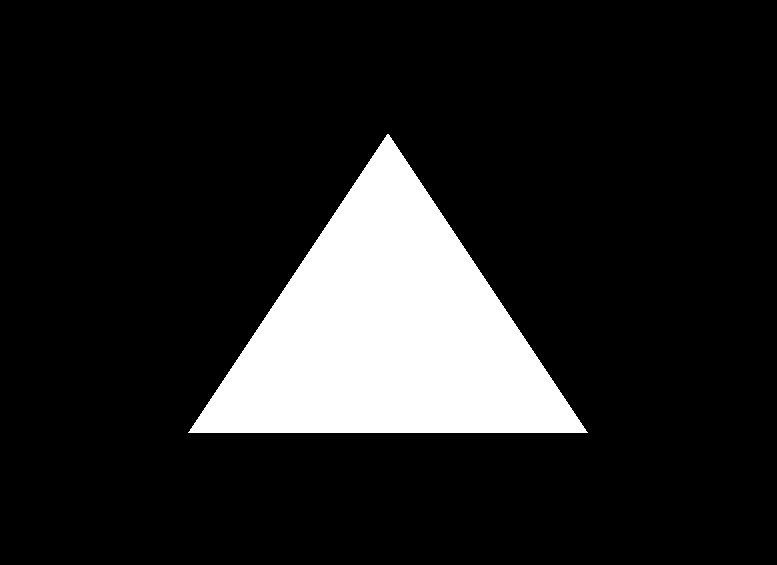

In [6]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203316.png"))

In [1]:
import glfw #GLFW is a small, cross‑platform library for creating windows, OpenGL/Vulkan contexts, and handling input and events.
from OpenGL.GL import *

if not glfw.init():      
    raise Exception("GLFW cannot be initialized")
#Calls glfw.init() to initialize the GLFW library. If initialization fails it returns False, so the code raises an Exception to stop execution and report the failure.
window = glfw.create_window(800, 600, "OpenGL Window", None, None)

#Creates a window with width 800 and height 600 pixels and the title "OpenGL Window".
#The last two parameters are for monitor (for fullscreen) and share (to share resources with another context); passing None means a normal window with no shared context.
#The function returns a window handle (an object) on success or None on failure.

if not window:
    glfw.terminate()
    raise Exception("Window cannot be created")
#Checks whether window creation succeeded. If it failed, it calls glfw.terminate() to clean up GLFW state and raises an Exception.


glfw.make_context_current(window)  #Makes the OpenGL context associated with the created window the current context on the calling thread. 

while not glfw.window_should_close(window): #Starts the main loop. glfw.window_should_close(window) returns True when the user closes the window (or when you call glfw.set_window_should_close). The loop runs until the window should close.
    glClear(GL_COLOR_BUFFER_BIT) #Clears the framebuffer's color buffer using the current clear color. This erases the previous frame so you can draw a new one. By default the clear color is black (0,0,0,0) unless glClearColor was called before.
    
    # Rendering code 
    glBegin(GL_TRIANGLES)  #Begins specifying vertex data using OpenGL's immediate mode. GL_TRIANGLES tells OpenGL that each group of three vertices forms a triangle.
    glVertex2f(0.0, 0.5)
    glVertex2f(-0.5, -0.5)
    glVertex2f(0.5, -0.5)
    glEnd()
    
    glfw.swap_buffers(window)  #Swaps the front and back buffers of the double-buffered window. All drawing was done to the back buffer; swapping makes the newly drawn frame visible on screen. This prevents flicker and tearing from drawing directly to the displayed buffer.
    glfw.poll_events()  #glfw.poll_events() tells GLFW to process any pending windowing and input events and return immediately. It does not block — it just handles events that are waiting right now.

glfw.terminate()  #Called after the loop exits (window close requested). This destroys any remaining windows and releases resources allocated by GLFW. It should be called before the program exits.

Moving Triangle

Output


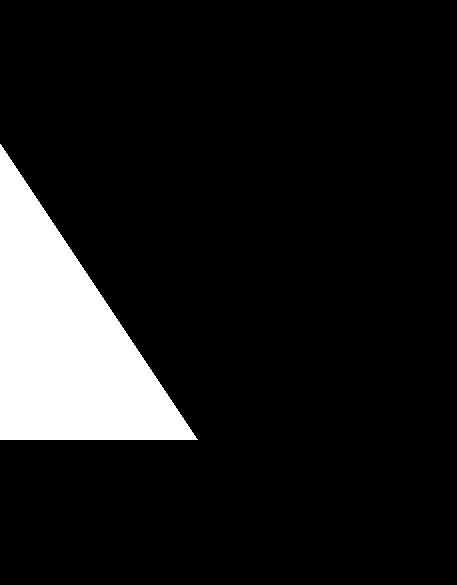

In [7]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203328.png"))

In [2]:
import glfw
from OpenGL.GL import *
import time

def draw_triangle(x):
    glBegin(GL_TRIANGLES)
    glVertex2f(x, 0.5)
    glVertex2f(x - 0.5, -0.5)
    glVertex2f(x + 0.5, -0.5)
    glEnd()

if not glfw.init():
    raise Exception("GLFW cannot be initialized")

window = glfw.create_window(800, 600, "2D Animation", None, None)

if not window:
    glfw.terminate()
    raise Exception("Window cannot be created")

glfw.make_context_current(window)

x_position = -1.0
while not glfw.window_should_close(window):
    glClear(GL_COLOR_BUFFER_BIT)
    
    # Draw moving triangle
    draw_triangle(x_position)
    
    # Update the position
    x_position += 0.01
    if x_position > 1.0:
        x_position = -1.0
    
    glfw.swap_buffers(window)
    glfw.poll_events()
    time.sleep(0.01)  # Control frame rate

glfw.terminate()

DDA_Class

Output


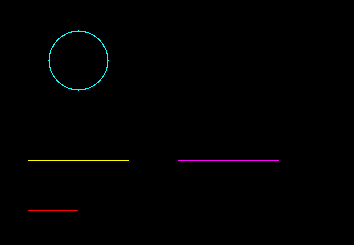

In [8]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203337.png"))

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *
import math


def bresenhamLine(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    p = 2 * dy - dx         #decision parameter to decide when to increment y.
    x = x0
    y = y0
    glVertex2i(x, y)
    while x < x1:
        x += 1
        if p >= 0:
            y += 1
            p += 2 * (dy - dx)
        else:
            p += 2 * dy
        glVertex2i(x, y)


def ddaline(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    step = max(abs(dx), abs(dy))
    xinc = dx / step
    yinc = dy / step
    x, y = x1, y1
    for i in range(step + 1):
        glVertex2i(round(x), round(y))
        x += xinc
        y += yinc


def bresenhamCircle(xc, yc, r):           #8 way cemtry 
    glBegin(GL_POINTS)
    glColor3f(0.0, 1.0, 1.0)
    for angle in range(0, 360):
        rad = math.radians(angle)
        x = xc + int(r * math.cos(rad))
        y = yc + int(r * math.sin(rad))
        glVertex2i(x, y)
    glEnd()


def main():
    # Normal Line
    glBegin(GL_LINES)
    glColor3f(1.0, 0.0, 0.0)
    glVertex2i(50, 50)
    glVertex2i(100, 50)
    glEnd()

    # Bresenham Line
    glBegin(GL_POINTS)
    glColor3f(1.0, 1.0, 0.0)
    bresenhamLine(50, 100, 150, 100)
    glEnd()

    # DDA Line
    glBegin(GL_POINTS)
    glColor3f(1.0, 0.0, 1.0)
    ddaline(200, 100, 300, 100)
    glEnd()

    # Circle
    bresenhamCircle(100, 200, 30)


def showScreen():
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glLoadIdentity()
    glViewport(0, 0, 500, 500)
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    glOrtho(0, 500, 0, 500, -1, 1)
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()
    main()
    glutSwapBuffers()


# Main Function
glutInit()
glutInitDisplayMode(GLUT_DOUBLE | GLUT_RGBA | GLUT_DEPTH)
glutInitWindowSize(500, 500)
glutInitWindowPosition(0, 0)
wind = glutCreateWindow(b"Demo")
glutDisplayFunc(showScreen)
glutIdleFunc(showScreen)
glutMainLoop()

DDA_Evaluation

Output


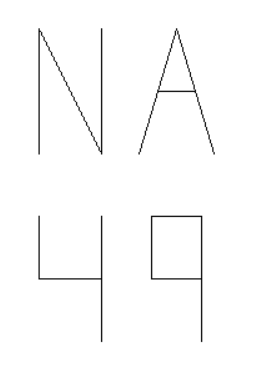

In [9]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203347.png"))

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *

# ------------------ DDA LINE ALGORITHM ------------------
def dda_line(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))
    x_inc = dx / steps
    y_inc = dy / steps

    x, y = x1, y1
    glBegin(GL_POINTS)
    for _ in range(int(steps) + 1):
        glVertex2i(int(round(x)), int(round(y)))
        x += x_inc
        y += y_inc
    glEnd()

# ------------------ DRAW NAME: NA ------------------
def draw_NA():
    # N
    dda_line(50, 350, 50, 450)
    dda_line(50, 450, 100, 350)
    dda_line(100, 350, 100, 450)

    # A
    dda_line(130, 350, 160, 450)
    dda_line(160, 450, 190, 350)
    dda_line(145, 400, 175, 400)

# ------------------ DRAW ROLL: 49 ------------------
def draw_49():
   
    # 4 (FIXED – proper shape)
    dda_line(50, 250, 50, 300)     # Left vertical (top only)
    dda_line(50, 250, 100, 250)   # Middle horizontal
    dda_line(100, 200, 100, 300)  # Right vertical (full)


    # 9
    dda_line(140, 300, 180, 300)
    dda_line(180, 300, 180, 250)
    dda_line(140, 250, 180, 250)
    dda_line(140, 250, 140, 300)
    dda_line(180, 250, 180, 200)

# ------------------ DISPLAY FUNCTION ------------------
def display():
    glClear(GL_COLOR_BUFFER_BIT)
    glColor3f(0.0, 0.0, 0.0)   # Black lines

    draw_NA()   # First line
    draw_49()   # Second line

    glFlush()

# ------------------ INIT ------------------
glutInit()
glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB)
glutInitWindowSize(500, 500)
glutCreateWindow(b"Name and Roll using Line Algorithm")

glClearColor(1.0, 1.0, 1.0, 1.0)  # White background
glMatrixMode(GL_PROJECTION)
glLoadIdentity()
glOrtho(0, 500, 0, 500, -1, 1)

glutDisplayFunc(display)
glutMainLoop()


Bresman_Evaluation

Output


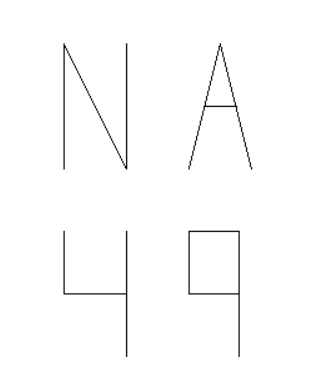

In [10]:
from PIL import Image
from IPython.display import display
print("Output")
display(Image.open("C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-12-27 203358.png"))

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
import time

# ------------------ GLOBALS ------------------
lines = []          # list of all line segments
current_line = 0    # which line is currently being drawn
delay = 0.05        # animation speed (seconds)

# ------------------ BRESENHAM LINE ------------------
def bresenham_line(x0, y0, x1, y1):
    points = []

    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        points.append((x0, y0))
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

    return points

# ------------------ STORE LINE ------------------
def add_line(x1, y1, x2, y2):
    lines.append(bresenham_line(x1, y1, x2, y2))

# ------------------ BUILD NA (CENTERED) ------------------
def build_NA(cx, cy):
    # N
    add_line(cx - 100, cy + 50, cx - 100, cy + 150)
    add_line(cx - 100, cy + 150, cx - 50, cy + 50)
    add_line(cx - 50, cy + 50, cx - 50, cy + 150)

    # A
    add_line(cx, cy + 50, cx + 25, cy + 150)
    add_line(cx + 25, cy + 150, cx + 50, cy + 50)
    add_line(cx + 12, cy + 100, cx + 38, cy + 100)

def build_49(cx, cy):
    # ---- 4 (FIXED – no inverse h) ----
    add_line(cx - 100, cy + 100, cx - 100, cy + 150)  # left vertical (short)
    add_line(cx - 100, cy + 100, cx - 50,  cy + 100)  # middle bar
    add_line(cx - 50,  cy + 50,  cx - 50,  cy + 150)  # right vertical (full)

    # ---- 9 ----
    add_line(cx,      cy + 150, cx + 40, cy + 150)
    add_line(cx + 40, cy + 150, cx + 40, cy + 100)
    add_line(cx,      cy + 100, cx + 40, cy + 100)
    add_line(cx,      cy + 100, cx,      cy + 150)
    add_line(cx + 40, cy + 100, cx + 40, cy + 50)

# ------------------ DISPLAY ------------------
def display():
    glClear(GL_COLOR_BUFFER_BIT)
    glColor3f(0.0, 0.0, 0.0)

    glBegin(GL_POINTS)
    for i in range(current_line):
        for (x, y) in lines[i]:
            glVertex2i(x, y)
    glEnd()

    glutSwapBuffers()

# ------------------ ANIMATION ------------------
def animate():
    global current_line
    if current_line < len(lines):
        current_line += 1
        time.sleep(delay)
    glutPostRedisplay()

# ------------------ INIT ------------------
def init():
    glClearColor(1, 1, 1, 1)
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    glOrtho(0, 500, 0, 500, -1, 1)

    # Center of screen
    center_x = 250
    center_y = 250

    build_NA(center_x, center_y + 50)   # first line
    build_49(center_x, center_y - 100)  # second line

# ------------------ MAIN ------------------
glutInit()
glutInitDisplayMode(GLUT_DOUBLE | GLUT_RGB)
glutInitWindowSize(500, 500)
glutCreateWindow(b"Bresenham Animated NA 49")

init()

glutDisplayFunc(display)
glutIdleFunc(animate)
glutMainLoop()
